In [1]:
import numpy as np
from numpy.linalg import inv, pinv, norm, cond
from matplotlib import pyplot as plt

In [2]:
n = 100
k = 20
lamda_scale = 1
scale = 1
e1s = [1e-3]#np.logspace(-8,2,20)
e2s = np.logspace(-4,0,20)
title_str = f'spd_forward_error_n={n}_k={k}_lambda={lamda_scale}_e1={e1s[0]}'
num_experiments = 100

In [3]:
def compute_SMW(n,k,A,B,U,V,lamda,e1,e2,rand_seed=1):
    # np.random.seed(rand_seed)    \
    # add noise
    noise1 = np.random.normal(size=(n,n))
    noise1 *= e1/norm(noise1,ord=2)
    noise2 = np.random.normal(size=(k,k))
    noise2 *= e2/norm(noise2,ord=2)

    A_inv = inv(A)
    A_inv_norm = norm(A_inv,ord=2)
    A_til_inv = A_inv + noise1
    Z_inv = inv(np.eye(k)+V.T@A_til_inv@U) + noise2
    B_inv_approx = A_til_inv - A_til_inv@U@Z_inv@V.T@A_til_inv
    B_inv = inv(B) 
    error = norm(B_inv-B_inv_approx,ord=2)
    bound = e2*lamda*A_inv_norm**2 
    # B_inv_A_norm = norm(B_inv@A,ord=2)
    full_bound = e1 + ((A_inv_norm + e1)**2)*lamda*(e2+2*lamda*B_inv_A_norm**2*e1*cond(V)**2)+ \
    (2*A_inv_norm+e1)*lamda*B_inv_A_norm*e1
    return error,bound,full_bound


In [4]:
errors = np.zeros((len(e1s),len(e2s)),dtype=float)
bounds = np.zeros((len(e1s),len(e2s)),dtype=float)
full_bounds = np.zeros((len(e1s),len(e2s)),dtype=float)

A = np.random.normal(size=(n,n),scale= scale)
A = A@A.T # make A positive semidefinite
U = np.random.normal(size=(n,k))
U /= norm(U, ord=2)
V = U.copy()
sigma_min = np.min(np.linalg.svd(A,compute_uv=False))
lamda = lamda_scale*sigma_min
B = A + lamda*U@V.T
B_inv_A_norm = norm(inv(B)@A,ord=2)
print('B_inv_A_norm = %f'%B_inv_A_norm)

for i,e1 in enumerate(e1s):
    for j,e2 in enumerate(e2s):
        e_ij = np.zeros(num_experiments); b_ij = np.zeros(num_experiments); f_ij = np.zeros(num_experiments)
        for t in range(num_experiments):
            e_ij[t],b_ij[t],f_ij[t] = compute_SMW(n,k,A,B,np.sqrt(lamda)*U,np.sqrt(lamda)*V,lamda,e1,e2)
        errors[i,j] = np.mean(e_ij)
        bounds[i,j] = np.mean(b_ij)
        full_bounds[i,j] = np.mean(f_ij)

B_inv_A_norm = 1.082052


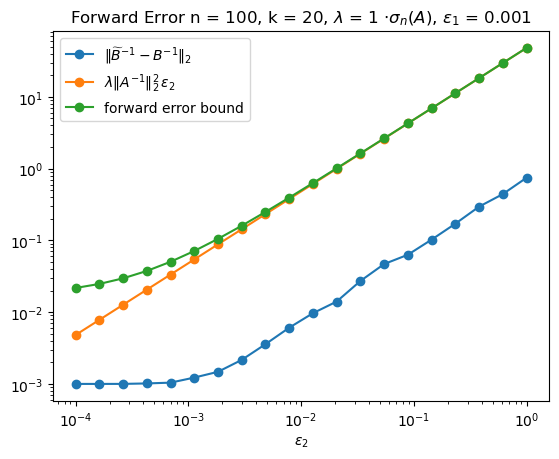

In [9]:
plt.loglog(e2s,errors[0,:],label=r'$\|\widetilde{B}^{-1}-B^{-1}\|_2$',marker='o')
plt.loglog(e2s,bounds[0,:],label=r'$\lambda\|A^{-1}\|_2^2 \,\epsilon_2$',marker='o')
plt.loglog(e2s,full_bounds[0,:],label='forward error bound',marker='o')
# plt.axvline(x=1/2/lamda/norm(inv(B)@A,ord=2),ls=':',color='red',label=r'$\frac{1}{2\lambda \kappa(V)\|B^{-1}A \|_2}$')
plt.legend()
plt.xlabel(r'$\epsilon_2$')
plt.title(f'Forward Error n = {n}, k = {k}, '+r'$\lambda$'+f' = {lamda_scale} '+r'$\cdot\sigma_{n}(A)$'+', '+r'$\epsilon_1$'+f' = {e1s[0]}')
plt.savefig('spd/'+title_str+'.png')

In [6]:
print(1/(2*lamda*cond(V)*B_inv_A_norm))

9.160837212677043
